In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [138]:
w=16

In [139]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [140]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475321, 16, 16)
strides:  (2048, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x296e067f040
byteorder:  little
byteswap:  False
type: float64


In [141]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [142]:
np.info(labels)

class:  ndarray
shape:  (475321,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x29303926040
byteorder:  little
byteswap:  False
type: float64


In [143]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [144]:
training_sample_labels

380256

In [145]:
training_sample

380256

In [146]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [147]:
train_X.shape

(380256, 16, 15)

In [148]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [149]:
#print(train_X)

In [150]:
train_y.shape

(380256,)

In [151]:
#print(test_y)

In [152]:
train_y=train_y.reshape(train_y.shape[0],1)

In [153]:
test_y=test_y.reshape(test_y.shape[0],1)

In [154]:
#print(train_X)

In [155]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380256, 16, 15) (380256, 1) (95065, 16, 15) (95065, 1)


In [156]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),
    keras.layers.GRU(units=64,return_sequences=True),
    keras.layers.GRU(units=32),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
opt=keras.optimizers.SGD(learning_rate=2.5)
model_gru.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

In [157]:
model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 16, 128)           55680     
                                                                 
 gru_13 (GRU)                (None, 16, 64)            37248     
                                                                 
 gru_14 (GRU)                (None, 32)                9408      
                                                                 
 dense_8 (Dense)             (None, 50)                1650      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [158]:
 start = t.time()

In [159]:
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y),batch_size=16384)#, shuffle=False)

Epoch 1/140
24/24 [==============================] - 8s 131ms/step - loss: 0.7922 - accuracy: 0.6977 - val_loss: 0.5598 - val_accuracy: 0.7531
Epoch 2/140
24/24 [==============================] - 2s 80ms/step - loss: 0.5734 - accuracy: 0.7393 - val_loss: 0.5587 - val_accuracy: 0.7531
Epoch 3/140
24/24 [==============================] - 2s 80ms/step - loss: 0.5729 - accuracy: 0.7393 - val_loss: 0.5574 - val_accuracy: 0.7531
Epoch 4/140
24/24 [==============================] - 2s 81ms/step - loss: 0.5702 - accuracy: 0.7393 - val_loss: 0.5550 - val_accuracy: 0.7531
Epoch 5/140
24/24 [==============================] - 2s 81ms/step - loss: 0.5929 - accuracy: 0.7182 - val_loss: 0.5599 - val_accuracy: 0.7531
Epoch 6/140
24/24 [==============================] - 2s 82ms/step - loss: 0.5738 - accuracy: 0.7393 - val_loss: 0.5596 - val_accuracy: 0.7531
Epoch 7/140
24/24 [==============================] - 2s 81ms/step - loss: 0.5738 - accuracy: 0.7393 - val_loss: 0.5597 - val_accuracy: 0.7531
Epoch

24/24 [==============================] - 2s 81ms/step - loss: 0.5143 - accuracy: 0.7398 - val_loss: 0.4778 - val_accuracy: 0.7540
Epoch 59/140
24/24 [==============================] - 2s 81ms/step - loss: 0.5155 - accuracy: 0.7390 - val_loss: 0.4875 - val_accuracy: 0.7531
Epoch 60/140
24/24 [==============================] - 2s 81ms/step - loss: 0.5201 - accuracy: 0.7398 - val_loss: 0.4790 - val_accuracy: 0.7531
Epoch 61/140
24/24 [==============================] - 2s 82ms/step - loss: 0.5131 - accuracy: 0.7403 - val_loss: 0.4929 - val_accuracy: 0.7531
Epoch 62/140
24/24 [==============================] - 2s 82ms/step - loss: 0.5083 - accuracy: 0.7406 - val_loss: 0.5134 - val_accuracy: 0.7531
Epoch 63/140
24/24 [==============================] - 2s 83ms/step - loss: 0.5127 - accuracy: 0.7412 - val_loss: 0.4765 - val_accuracy: 0.7531
Epoch 64/140
24/24 [==============================] - 2s 83ms/step - loss: 0.5141 - accuracy: 0.7398 - val_loss: 0.4761 - val_accuracy: 0.7531
Epoch 65/140

24/24 [==============================] - 2s 82ms/step - loss: 0.4778 - accuracy: 0.7541 - val_loss: 0.4589 - val_accuracy: 0.7587
Epoch 116/140
24/24 [==============================] - 2s 81ms/step - loss: 0.4733 - accuracy: 0.7544 - val_loss: 0.5096 - val_accuracy: 0.7556
Epoch 117/140
24/24 [==============================] - 2s 81ms/step - loss: 0.4768 - accuracy: 0.7526 - val_loss: 0.4841 - val_accuracy: 0.7457
Epoch 118/140
24/24 [==============================] - 2s 81ms/step - loss: 0.4815 - accuracy: 0.7517 - val_loss: 0.4555 - val_accuracy: 0.7584
Epoch 119/140
24/24 [==============================] - 2s 82ms/step - loss: 0.4763 - accuracy: 0.7543 - val_loss: 0.4601 - val_accuracy: 0.7520
Epoch 120/140
24/24 [==============================] - 2s 81ms/step - loss: 0.4775 - accuracy: 0.7534 - val_loss: 0.4596 - val_accuracy: 0.7654
Epoch 121/140
24/24 [==============================] - 2s 81ms/step - loss: 0.4782 - accuracy: 0.7535 - val_loss: 0.4564 - val_accuracy: 0.7689
Epoch 

In [160]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 16s 5ms/step


In [161]:
stop=t.time()-start
print(stop)

300.53099966049194


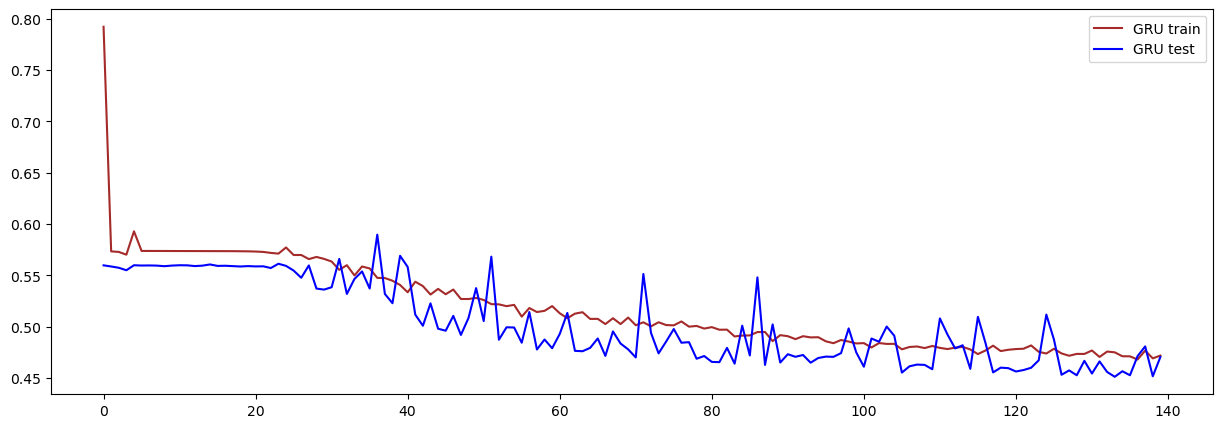

In [162]:
#plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
#plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

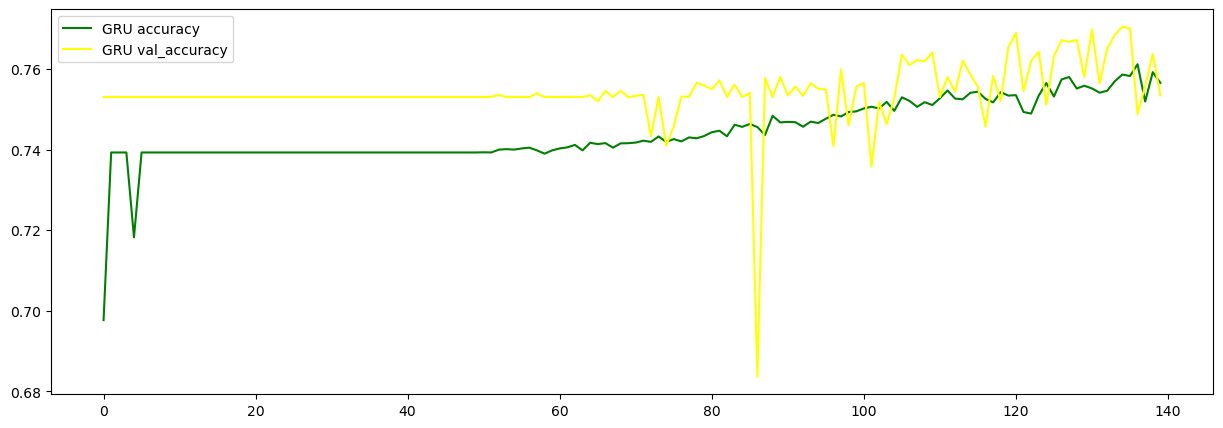

In [163]:
plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.legend()
plt.show()

In [164]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [165]:
np.shape(pred_y)

(95065, 1)

In [166]:
pred_y

array([[0.04220542],
       [0.03481331],
       [0.00735745],
       ...,
       [0.25978142],
       [0.2588468 ],
       [0.25953978]], dtype=float32)

In [167]:
pred_y=np.reshape(pred_y,95065)

0.15811531036714427
0.14975353860206275
0.3976371591880521
0.33756606685776447


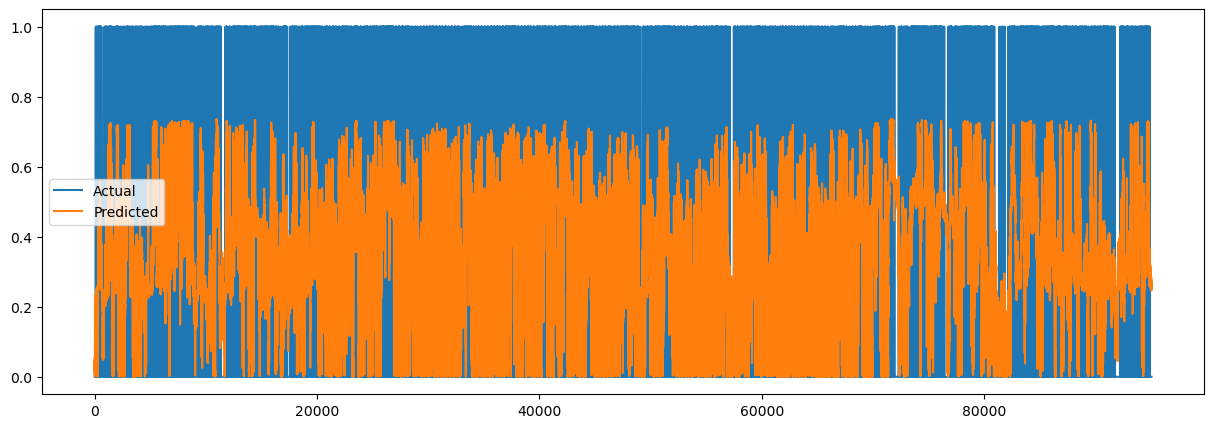

In [168]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [169]:
np.shape(train_X)

(380256, 16, 15)

In [170]:
np.shape(train_y)

(380256, 1)

In [171]:
np.shape(test_X)

(95065, 16, 15)

In [172]:
np.shape(test_y)

(95065, 1)

14854/14854 [==============================] - 75s 5ms/step


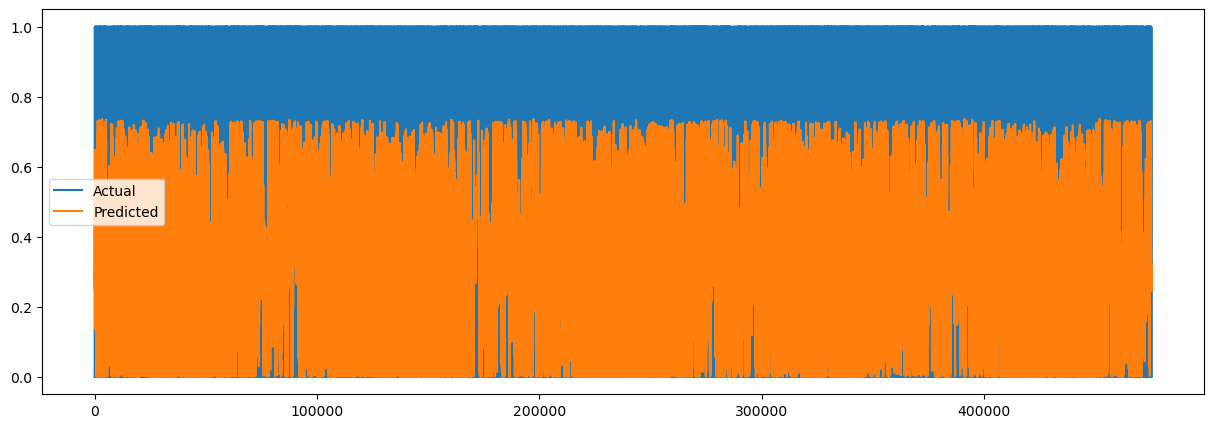

In [173]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

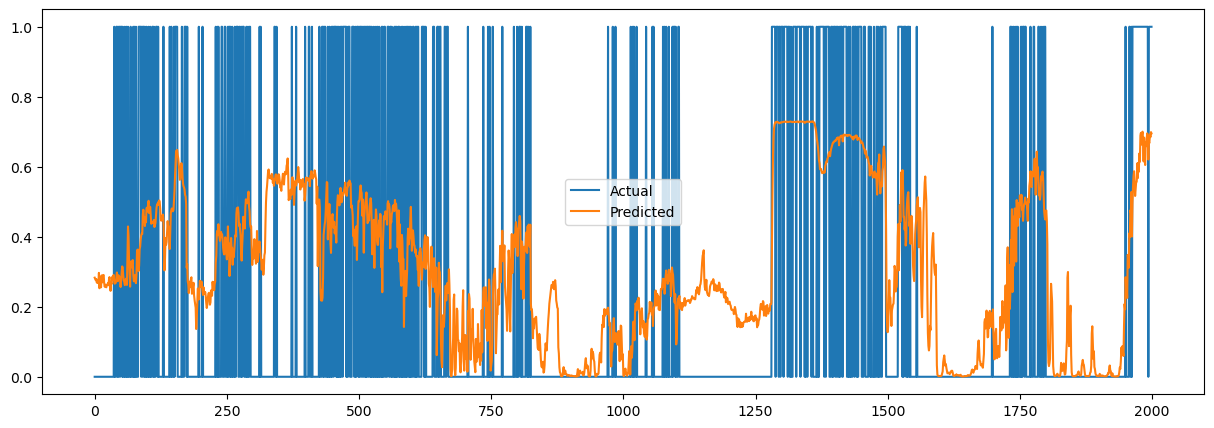

In [174]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [175]:
print(sum(tes)/len(tes))

[0.25794568]


In [176]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.52985862]
[0.83624812]
total acc [0.75741867]


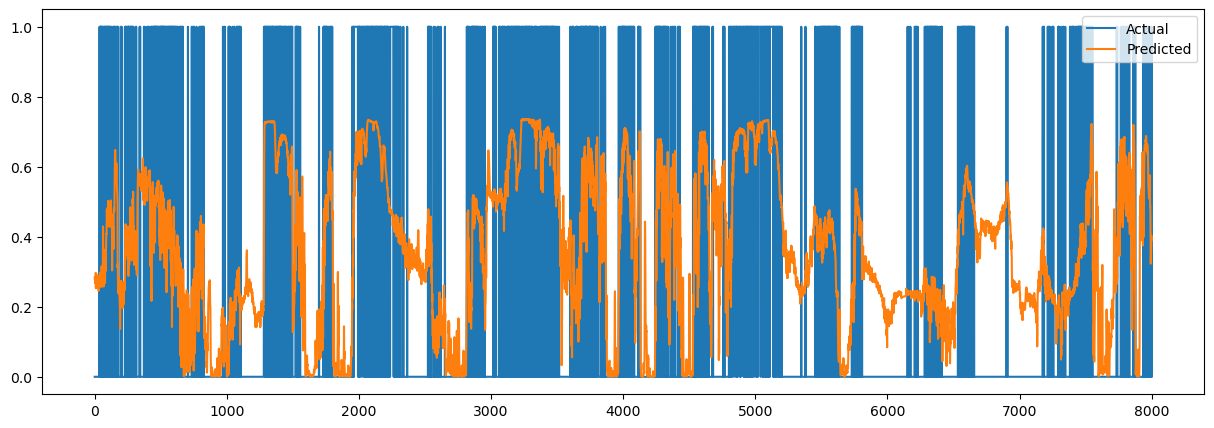

In [177]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

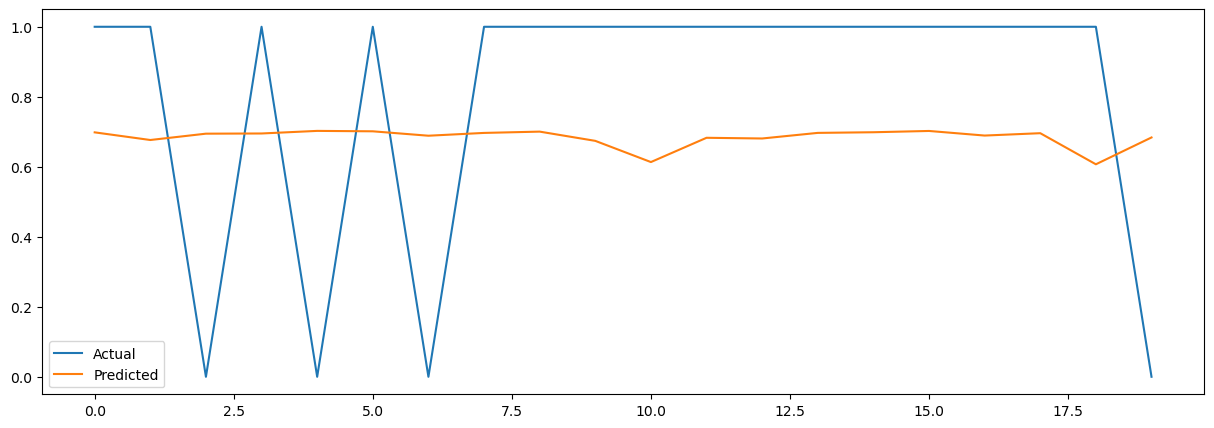

In [178]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

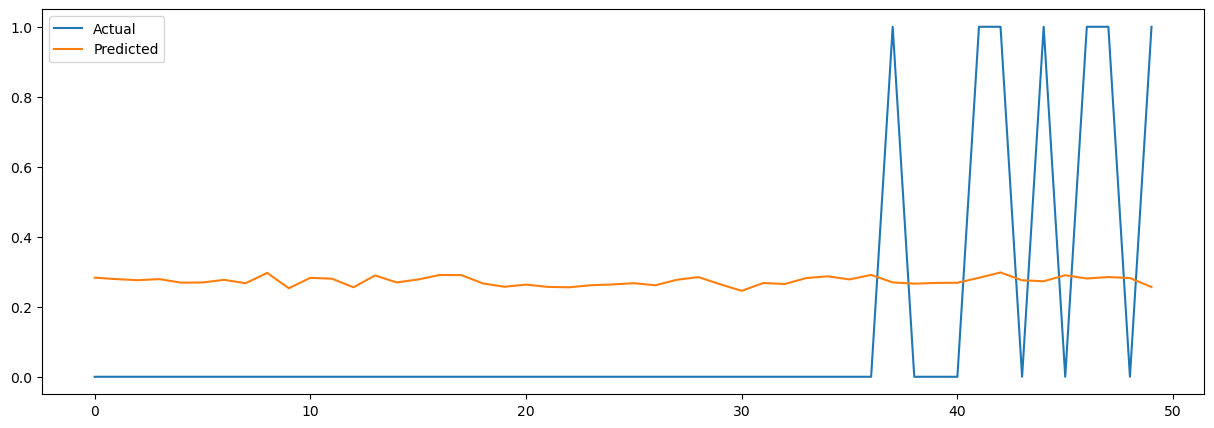

In [179]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

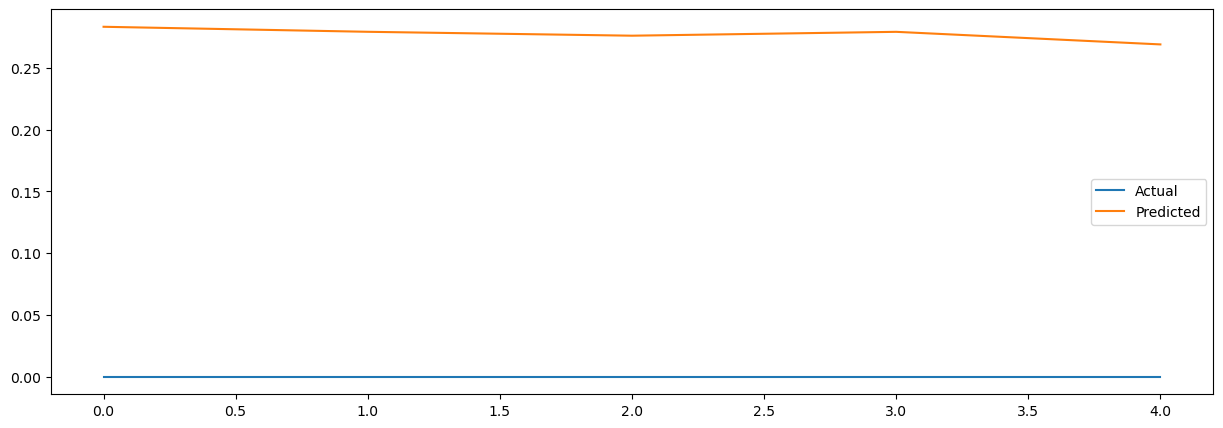

In [180]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [181]:
tf.config.experimental.get_memory_info('GPU:0')

{'current': 550029824, 'peak': 2817647616}